#  Experiment 13
## Dhruv Singhal || 500075346 || R177219074 || AIML || Sem5
## Random Forest Classfier

### Importing required libraries


In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Data creation
Creating Dataset using make_classfication with 5000 sample points and 5 classes with 20 number of features in which 10 are informative features and 5 are redundant features and shuffling is turned ON 

In [2]:
X,y = make_classification(n_samples=5000,n_classes=5,n_features=20,
n_informative=10,n_redundant=5,shuffle=True,random_state=0)
X=pd.DataFrame(X)
y=pd.DataFrame(y)

### Preprocessing & Visualization
since we have created dataset using make_classfiocation , it by default make dataset's mean tending to 0 and Standard Deviation to 1 which doesn't require any preprocessing.
For Visualization varition of values of X(with 20 features) and y's distplot to observe y's vartion of values and distplot of X to check if any pre processing is to be required

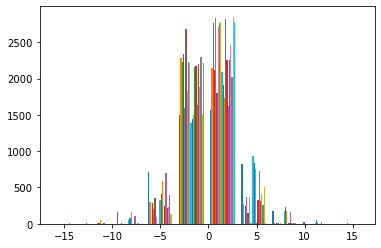

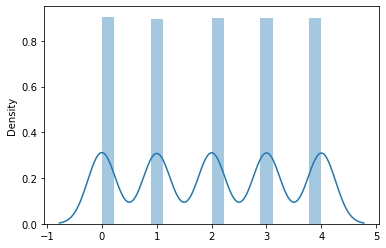

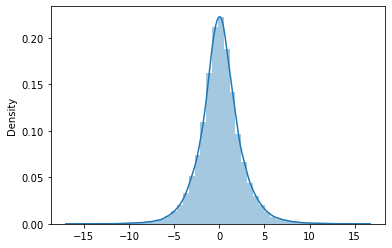

In [3]:
plt.hist(X)
plt.show()
sns.distplot(y)
plt.show()
sns.distplot(X)
plt.show()


feature extraction preprocessing, correlation matrix to check if any pre processing is to be required

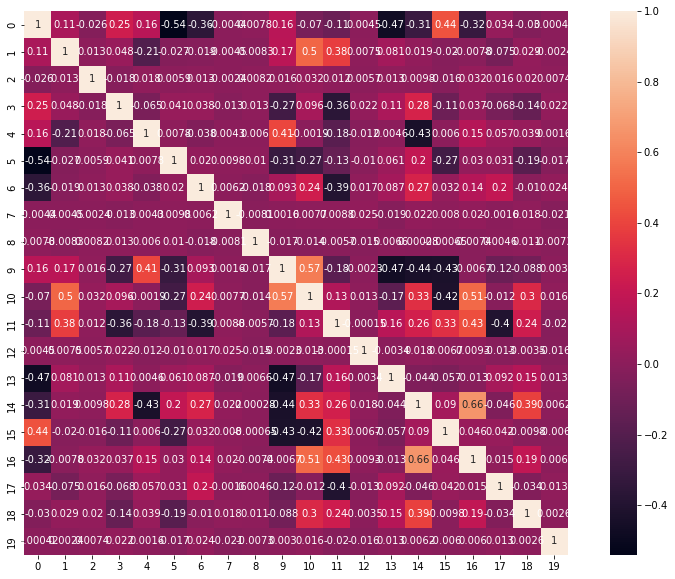

In [4]:
_,graph=plt.subplots(figsize=(15,10))
sns.heatmap(X.corr(),annot=True,ax=graph,square=True)
plt.show()

### Model Building
                                                    
Random forest classifier creates a set of decision trees from a randomly selected subset of the training set. It is basically a set of decision trees from a randomly selected subset of the training set and then It collects the votes from different decision trees to decide the final prediction.
Assuming dataset has “m” features, the random forest will randomly choose “k” features where k < m.  Now, the algorithm will calculate the root node among the k features by picking a node that has the highest information gain. 
After that, the algorithm splits the node into child nodes and repeats this process “n” times. Now we have a forest with n trees. Finally, perform bootstrapping, ie, combine the results of all the decision trees present in the forest.

We have directly used the in built function of sklearn library i.e., from sklearn.ensemble import RandomForestClassifier which directly imports this classifier

### Compile & Train
Firstly splitting the input dataset into training and test parts following which training set is passed through RandomForestClassifier and is fitted to it.
and predicting over the test test to check the model performance. 

In [5]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.20,random_state=42)

model=RandomForestClassifier()
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)
print("train Accuracy:",model.score(X_train,Y_train))
print("test Accuracy:",model.score(X_test,Y_test))

train Accuracy: 1.0
test Accuracy: 0.79


###  Result
since training is giving 100% accuracy and in testing it is giving 79% accuracy so it's clearly overfitting so to overcome this we are using k fold cross validation and hyperparameter tuning to improve the overall score and generate generalizesd model and knowing which hyperparameter combination  gives best overall score

In [6]:
#Cross Validation without Hyper parameter tuning 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(max_depth=10, random_state=0)
kf=KFold(n_splits=7)
score=cross_val_score(clf, X, y, scoring='accuracy',cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.78461538 0.77062937 0.80672269 0.82633053 0.78431373 0.78011204
 0.79411765]
Average Cross Validation score :0.7924059134143168


In [7]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'n_estimators':[10,20,40,100],'criterion':['gini', 'entropy'],
                     'max_features':['auto', 'sqrt', 'log2'],'bootstrap':[True,False]}]
clf=GridSearchCV(RandomForestClassifier(),tuned_parameters,scoring=('accuracy'),verbose=3)
clf.fit(X,y)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Best Score:",clf.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END bootstrap=True, criterion=gini, max_features=auto, n_estimators=10;, score=0.731 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_features=auto, n_estimators=10;, score=0.745 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_features=auto, n_estimators=10;, score=0.763 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_features=auto, n_estimators=10;, score=0.741 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_features=auto, n_estimators=10;, score=0.723 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_features=auto, n_estimators=20;, score=0.757 total time=   0.2s
[CV 2/5] END bootstrap=True, criterion=gini, max_features=auto, n_estimators=20;, score=0.790 total time=   0.2s
[CV 3/5] END bootstrap=True, criterion=gini, max_features=auto, n_estimators=20;, score=0.791 total time=   0.2s
[CV 4/5] END bootstrap=True, crite

[CV 3/5] END bootstrap=True, criterion=entropy, max_features=auto, n_estimators=40;, score=0.810 total time=   1.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_features=auto, n_estimators=40;, score=0.783 total time=   1.1s
[CV 5/5] END bootstrap=True, criterion=entropy, max_features=auto, n_estimators=40;, score=0.785 total time=   1.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_features=auto, n_estimators=100;, score=0.803 total time=   2.7s
[CV 2/5] END bootstrap=True, criterion=entropy, max_features=auto, n_estimators=100;, score=0.803 total time=   2.8s
[CV 3/5] END bootstrap=True, criterion=entropy, max_features=auto, n_estimators=100;, score=0.828 total time=   2.9s
[CV 4/5] END bootstrap=True, criterion=entropy, max_features=auto, n_estimators=100;, score=0.788 total time=   2.9s
[CV 5/5] END bootstrap=True, criterion=entropy, max_features=auto, n_estimators=100;, score=0.808 total time=   2.6s
[CV 1/5] END bootstrap=True, criterion=entropy, max_features=sqrt, 

[CV 4/5] END bootstrap=False, criterion=gini, max_features=sqrt, n_estimators=10;, score=0.744 total time=   0.2s
[CV 5/5] END bootstrap=False, criterion=gini, max_features=sqrt, n_estimators=10;, score=0.760 total time=   0.3s
[CV 1/5] END bootstrap=False, criterion=gini, max_features=sqrt, n_estimators=20;, score=0.782 total time=   0.6s
[CV 2/5] END bootstrap=False, criterion=gini, max_features=sqrt, n_estimators=20;, score=0.804 total time=   0.4s
[CV 3/5] END bootstrap=False, criterion=gini, max_features=sqrt, n_estimators=20;, score=0.811 total time=   0.3s
[CV 4/5] END bootstrap=False, criterion=gini, max_features=sqrt, n_estimators=20;, score=0.774 total time=   0.3s
[CV 5/5] END bootstrap=False, criterion=gini, max_features=sqrt, n_estimators=20;, score=0.785 total time=   0.3s
[CV 1/5] END bootstrap=False, criterion=gini, max_features=sqrt, n_estimators=40;, score=0.796 total time=   0.7s
[CV 2/5] END bootstrap=False, criterion=gini, max_features=sqrt, n_estimators=40;, score

[CV 5/5] END bootstrap=False, criterion=entropy, max_features=sqrt, n_estimators=40;, score=0.800 total time=   1.6s
[CV 1/5] END bootstrap=False, criterion=entropy, max_features=sqrt, n_estimators=100;, score=0.794 total time=   4.4s
[CV 2/5] END bootstrap=False, criterion=entropy, max_features=sqrt, n_estimators=100;, score=0.826 total time=   4.4s
[CV 3/5] END bootstrap=False, criterion=entropy, max_features=sqrt, n_estimators=100;, score=0.836 total time=   4.7s
[CV 4/5] END bootstrap=False, criterion=entropy, max_features=sqrt, n_estimators=100;, score=0.807 total time=   4.4s
[CV 5/5] END bootstrap=False, criterion=entropy, max_features=sqrt, n_estimators=100;, score=0.830 total time=   4.2s
[CV 1/5] END bootstrap=False, criterion=entropy, max_features=log2, n_estimators=10;, score=0.751 total time=   0.4s
[CV 2/5] END bootstrap=False, criterion=entropy, max_features=log2, n_estimators=10;, score=0.783 total time=   0.4s
[CV 3/5] END bootstrap=False, criterion=entropy, max_featur

Best parameters set found on development set:

{'bootstrap': False, 'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 100}

Best Score: 0.8214
Now the overall score is 82.14% accuracy which is above the testing accuracy without cross validation 